In [1]:
# Local Binary Pattern을 사용해 Texture를 분석하는 코드이다.

# https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
# import the necessary packages
from pyimagesearch.localbinarypatterns import LocalBinaryPatterns
from sklearn.svm import LinearSVC
from imutils import paths
import argparse
import cv2
import os
import matplotlib.pyplot as plt


training_images_path = "./images/training/"
testing_images_path = "./images/testing/"
temp_path = "./images/temp/"

# # initialize the local binary patterns descriptor along with
# # the data and label lists
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []


kind_of_labels = os.listdir(training_images_path)
imagePaths = list(map(lambda x:training_images_path + x + "/", kind_of_labels))
print(imagePaths)

# loop over the training images
for imagePath in imagePaths:
    print(imagePath)
    label = imagePath.split('/')[-2]
    print(label)
    for imageName in os.listdir(imagePath):
        # load the image, convert it to grayscale, and describe it
        image = cv2.imread(imagePath + imageName)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist = desc.describe(gray)
        # extract the label from the image path, then update the
        # label and data lists
        labels.append(label)

        data.append(hist)
        ##
#         fig, ax = plt.subplots(1, 2, figsize=(13, 6))#, sharex=True, sharey=True
#         ax[0].plot(hist)
#         ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#         ax[1].set_title(label)

#         plt.tight_layout()
#         plt.show()

# # # train a Linear SVM on the data

['./images/training/grass/', './images/training/road/', './images/training/rocks/']
./images/training/grass/
grass
./images/training/road/
road
./images/training/rocks/
rocks


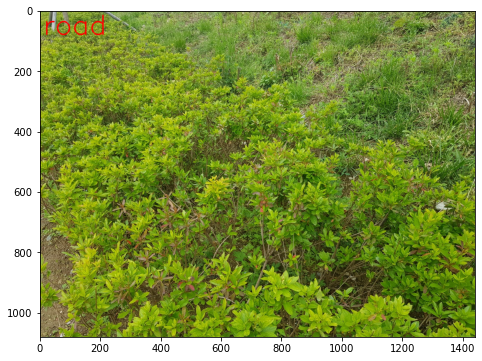

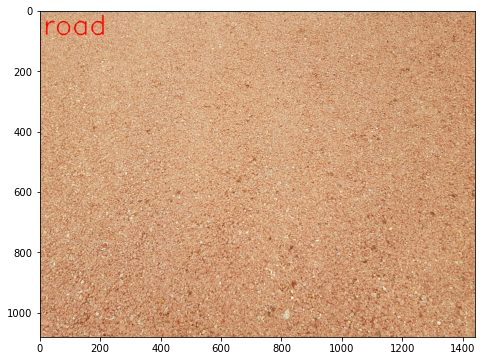

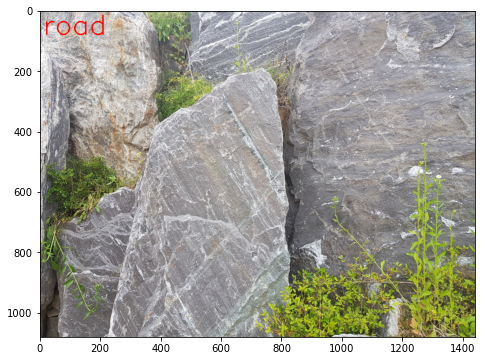

In [2]:
# # model = LinearSVC(C=100.0, random_state=42)
model = LinearSVC(C=1, random_state=42, max_iter = 10000000)
model.fit(data, labels)
#
# # loop over the testing images
for imagePath in os.listdir(testing_images_path):
    # load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(testing_images_path + imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model.predict(hist.reshape(1, -1))

    # display the image and the prediction
    cv2.putText(image, prediction[0], (10, 80), cv2.FONT_HERSHEY_SIMPLEX,
                3, (0, 0, 255), 3)

    plt.figure(figsize = (13, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()